In [141]:
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [79]:
df = pd.read_csv('1976-2016-president.csv')
electoral_votes = pd.read_csv('electoral_votes.csv')
state_list = list(df.state.unique())

In [80]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [37]:
election_results = df[['year','state','candidate','party','candidatevotes','totalvotes']]
election_results.head()

,year,state,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,"Maddox, Lester",american independent party,9198,1182850
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850
4,1976,Alabama,"Hall, Gus",communist party use,1954,1182850


In [91]:
election_year = 2016

selected_election_results = election_results[(election_results['year'] == election_year) & 
                                             ((election_results['party'] == 'republican') | (election_results['party'] == 'democrat'))]
df_gen = []
for i, state in enumerate(state_list):
    evotes = int(electoral_votes[electoral_votes['state']==state].evotes)
    df_gen.append([state, 'republican',selected_election_results[(selected_election_results['state']==state) &
                                                                 (selected_election_results['party']=='republican')].candidatevotes.sum(), evotes])
    df_gen.append([state, 'democrat',selected_election_results[(selected_election_results['state']==state) & 
                                                               (selected_election_results['party']=='democrat')].candidatevotes.sum(), evotes])

In [93]:
clean_election_results = pd.DataFrame(df_gen, columns=['state','party','votes', 'evotes'])
clean_election_results

,state,party,votes,evotes
0,Alabama,republican,1318255,9
1,Alabama,democrat,729547,9
2,Alaska,republican,163387,3
3,Alaska,democrat,116454,3
4,Arizona,republican,1252401,11
5,Arizona,democrat,1161209,11
6,Arkansas,republican,684872,6
7,Arkansas,democrat,380494,6
8,California,republican,4483810,55
9,California,democrat,8753788,55


In [157]:
def att_pos_reward(state, election_results):
    evotes = int(electoral_votes[electoral_votes['state']==state].evotes)
    dem_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='democrat')].votes)
    rep_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='republican')].votes)
    total_votes = dem_votes + rep_votes
    margin = (max(dem_votes, rep_votes) - min(dem_votes, rep_votes))/total_votes
    return evotes * margin

def att_neg_reward(state, election_results):
    return 0


def def_pos_reward(state, election_results):
    multiplier = 1.5
    return multiplier * att_pos_reward(state, election_results)
#     return 30

def def_neg_reward(state, election_results):
    multiplier = 1.5
    return -1 * multiplier * att_pos_reward(state, election_results)

In [158]:
att_pos_reward("New York", clean_election_results)

7.778673769869716

In [159]:
def get_rep_states(election_results):
    rep_state_list = []
    for state in state_list:
        dem_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='democrat')].votes)
        rep_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='republican')].votes)
        if(dem_votes < rep_votes):
            rep_state_list.append(state)
    return rep_state_list

def get_dem_states(election_results):
    dem_state_list = []
    for state in state_list:
        dem_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='democrat')].votes)
        rep_votes = int(election_results[(election_results['state']==state) & (election_results['party']=='republican')].votes)
        if(dem_votes > rep_votes):
            dem_state_list.append(state)
    return dem_state_list

In [160]:
dem_state_list = get_dem_states(clean_election_results)
rep_state_list = get_rep_states(clean_election_results)

In [161]:
def get_array_strings(state_list, election_results):
    att_pos_array = ''
    att_neg_array = ''
    def_pos_array = ''
    def_neg_array = ''
    for i, state in enumerate(state_list):
        att_pos_array += '['+str(att_pos_reward(state, election_results))+']'+','
        att_neg_array += '['+str(att_neg_reward(state, election_results))+']'+','
        def_pos_array += '['+str(def_pos_reward(state, election_results))+']'+','
        def_neg_array += '['+str(def_neg_reward(state, election_results))+']'+','

    att_pos_array = att_pos_array[:-1]
    att_neg_array = att_neg_array[:-1]
    def_pos_array = def_pos_array[:-1]
    def_neg_array = def_neg_array[:-1]

    att_output_string = 'np.array([[' +att_pos_array + '],[' + att_neg_array+ ']])'

    def_output_string = 'np.array([[' +def_neg_array + '],[' + def_pos_array+ ']])'
    
    return att_output_string, def_output_string

In [162]:
get_array_strings(state_list, clean_election_results)

('np.array([[[2.587345846912934],[0.5031392826640843],[0.41560649815007394],[1.7142165227724555],[17.74104259700287],[0.4830000070828385],[0.9998166524169095],[0.35991728662087324],[2.741711300511245],[0.35892457420977913],[0.8515752317770282],[1.3953069960428364],[1.4648141344644467],[3.608020556284592],[2.2258080953917756],[0.6076257414144414],[1.3333764411128],[2.5073006428015776],[1.6274683580492466],[0.12774329033300255],[2.802199101713032],[3.2232813117184893],[0.037653829427695386],[0.16633874143609695],[1.0907816788872071],[1.9637121991132134],[0.6665798590214663],[1.3547674113177568],[0.15524513039822396],[0.01576227539045622],[2.039573240012362],[0.46507949343241106],[7.778673769869716],[0.5711237411156149],[1.1885545737911847],[1.5363664477689258],[2.7026632133659385],[0.8618174523076095],[0.15021432299606557],[0.6648563274127851],[1.3428461448943236],[0.958311484765875],[2.9973554699576375],[3.5820514392587106],[1.4859478014493543],[0.9111855794292223],[0.7348578320602221],

## Partisan Version - Republican Favored

In [130]:
att_string, def_string = get_array_strings(dem_state_list, clean_election_results)

In [133]:
len(dem_state_list)

21

In [131]:
att_string

'np.array([[[17.74104259700287],[0.4830000070828385],[0.9998166524169095],[0.35991728662087324],[2.741711300511245],[1.3953069960428364],[3.608020556284592],[0.12774329033300255],[2.802199101713032],[3.2232813117184893],[0.16633874143609695],[0.15524513039822396],[0.01576227539045622],[2.039573240012362],[0.46507949343241106],[7.778673769869716],[0.8618174523076095],[0.6648563274127851],[0.9111855794292223],[0.7348578320602221],[2.108863488015544]],[[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999],[-999]]])'

In [132]:
def_string

'np.array([[[-26.611563895504304],[-0.7245000106242578],[-1.4997249786253644],[-0.5398759299313098],[-4.112566950766867],[-2.0929604940642546],[-5.412030834426888],[-0.1916149354995038],[-4.203298652569548],[-4.834921967577734],[-0.24950811215414542],[-0.23286769559733594],[-0.02364341308568433],[-3.0593598600185428],[-0.6976192401486165],[-11.668010654804574],[-1.2927261784614144],[-0.9972844911191776],[-1.3667783691438333],[-1.1022867480903331],[-3.163295232023316]],[[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30],[30]]])'

Scale the reward with margin
scale the reward with number of votes
scale the reward with margin/population ratio

e_votes(state) = # of electoral votes

California 55, margin = 30%. Reward = 55*0.3 = 

Reward = e_votes * margin%


Arizona 11, 5%, Reward  = 11*0.05 = 
2%
1%

Defender Reward
Successful = e_votes * scaling
Not attacked = small reward or 0


Attacker Reward
Successful = e_votes * 


In [194]:

payoff = pd.read_csv('opt_defender_payoff_no_punishment.csv', header = None)
payoff = payoff.to_numpy().reshape(-1)

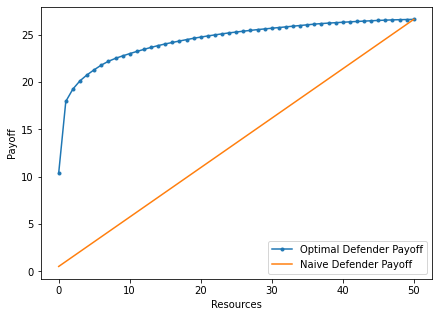

In [195]:
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff,'.-')
plt.plot(range(51), 26.611563895504304 * np.arange(1,52)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff.png', dpi = 300)

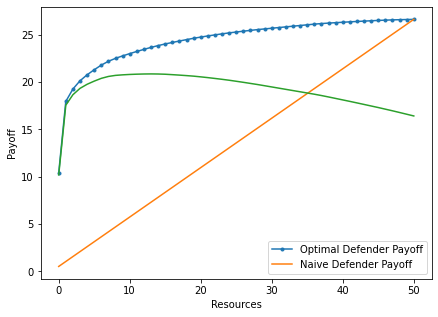

In [202]:
cost = 0.2

plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff,'.-')
plt.plot(range(51), 26.611563895504304 * np.arange(1,52)/51)
plt.plot(range(51), payoff - np.arange(1,52)*cost)
# plt.plot(range(51), 26.611563895504304 * np.arange(1,52)/51 - np.arange(1,52)*cost)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff.png', dpi = 300)

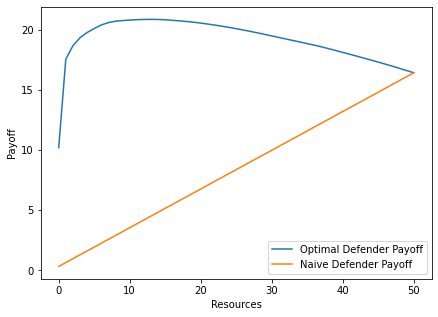

In [200]:
cost = 0.2

plt.rcParams['figure.figsize']=(7,5)
# plt.plot(range(51),payoff,'.-')
plt.plot(range(51), payoff - np.arange(1,52)*cost)
plt.plot(range(51), 26.611563895504304 * np.arange(1,52)/51 - np.arange(1,52)*cost)

plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff.png', dpi = 300)

In [166]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [184]:
np.arange(1,52)*cost

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5])

In [193]:
payoff.to_numpy().reshape(-1)

array([10.3886, 17.9481, 19.2542, 20.1252, 20.7567, 21.2889, 21.7828,
       22.1829, 22.4962, 22.7526, 22.9938, 23.223 , 23.4418, 23.6504,
       23.8407, 24.0161, 24.1716, 24.3241, 24.4721, 24.6145, 24.7395,
       24.8595, 24.9713, 25.0806, 25.1826, 25.274 , 25.3631, 25.4465,
       25.5297, 25.6023, 25.6744, 25.7464, 25.8185, 25.8906, 25.9627,
       26.0348, 26.1069, 26.1669, 26.2163, 26.2615, 26.3052, 26.349 ,
       26.3888, 26.4259, 26.4631, 26.4998, 26.5277, 26.5557, 26.5764,
       26.594 , 26.6116])